# Some Additional Help for Assignment 2

We start by importing the libraries we need and loading the assignment training data.

In [2]:
import joblib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Below, we are using the small dataset just to make things a bit faster.
images, face_ids = joblib.load('data/train.small.joblib')
print(images.shape)

(2500, 125, 94)


## Making the training data sub-images

There are a couple of different approaches that can be used. Either,

- Write a function to extract a sub-image from an image
- Use the PatchExtractor class from scikit-learn

In [4]:
def random_sub_image(images, n_pixels):
    face_index = np.random.randint(0, len(images))
    image = images[face_index]
    valid_x = image.shape[0] - n_pixels
    valid_y = image.shape[1] - n_pixels
    x = np.random.randint(0, valid_x)
    y = np.random.randint(0, valid_y)
    sub_image = image[x:x+n_pixels, y:y+n_pixels]
    return sub_image


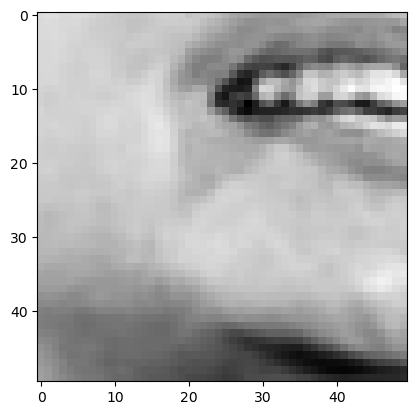

In [15]:
plt.imshow(random_sub_image(images, 50), cmap='gray')

Alternatively, you can use the `image` module from `sklearn.feature_extraction`.

In [19]:
from sklearn.feature_extraction import image

patch_extractor = image.PatchExtractor(patch_size=(50, 50), max_patches=2, random_state=0)

sub_images = patch_extractor.transform(images)

print(sub_images.shape)

(5000, 50, 50)


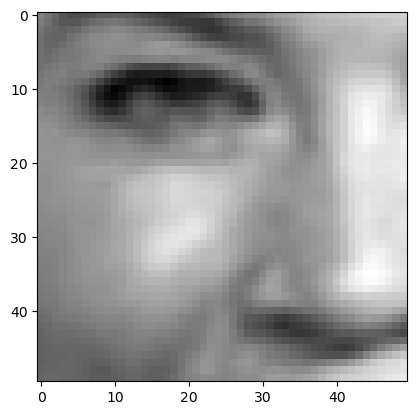

In [23]:
random_index = np.random.randint(0, len(sub_images))
plt.imshow(sub_images[random_index], cmap='gray')


## Rotation

Rotating images by multiples of 90 degrees can be done easily with `numpy.rot90`.

In [45]:
random_index = np.random.randint(0, len(sub_images))
sub_image = sub_images[random_index]


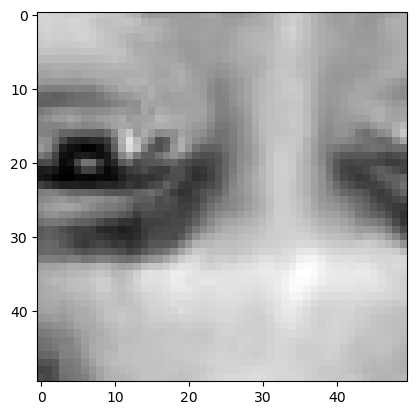

In [57]:
sub_image = np.rot90(sub_image, k=1)
plt.imshow(sub_image, cmap='gray')

## Reshaping from images to feature vectors

The classifier will need the image to be represented as a vector. We can use the `reshape` method to do this.

In [61]:
features = sub_image.reshape(-1)   
print(sub_image.shape) 
print(features.shape)

(50, 50)
(2500,)


In [60]:
all_features = sub_images.reshape(len(sub_images), -1)
print(sub_images.shape)
print(all_features.shape)


(5000, 50, 50)
(5000, 2500)
